# Proposta

A distribuidora de vinhos **FIAPWine** decidiu expandir seus horizontes e agora está importando vinhos tintos e branco portugueses, mais especificamente a marca "Vinho Verde", que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

Fui designado para fazer as análises nos vinhos tintos, então é necessário que você siga os seguintes passos:

1. Importe o dataset "winequality-red.csv" que pode ser baixado no seguinte link: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

2. Utilize o Pandas para verificar a estrutura do dataset (número de linhas, colunas, tipos de dados das colunas, etc).

3. Limpe o dataset, removendo linhas duplicadas e tratando valores faltantes.

4. Utilize o Matplotlib para visualizar as seguintes informações:

    / a. Distribuição da acidez volátil por qualidade do vinho?

    / b. Distribuição do teor alcóolico por qualidade do vinho?

    / c. Relação entre acidez volátil e teor alcóolico?

    / d. Relação entre acidez volátil e qualidade do vinho?

5. Análise os resultados e responda às seguintes perguntas:

    / d. Qual a acidez volátil média dos vinhos de qualidade elevada?

    / d. Qual a relação entre teor alcóolico e qualidade do vinho?

    / d. Há alguma relação entre acidez volátil e teor alcóolico?
    
    / d. Há alguma relação entre acidez volátil e qualidade do vinho?

In [1]:
import sys # Fornece acesso a variáveis e funções do sistema Python
import os # fornece interface com o sitema operacional
import pandas as pd

# Caminho absoluto para a pasta do projeto (nível acima de 'src')
project_root = os.path.abspath("..")

if project_root not in sys.path:
    sys.path.append(project_root)

# Importa Classes de objetos
from src.etl.extract import extract_csv_processed
from src.etl.stats import calcula_skew_kurtosis, obter_dados_nulos, detecta_outliers_iqr, matrix_correlacao
from src.visualization.graficos import grafo_barra, grafo_heatmap, grafo_scatterplot, grafo_boxplot, grafo_distribuicao

In [2]:
# Extrai dados processados
input_path = 'arquivos_exploratorio.csv'

df = extract_csv_processed(input_path)
df

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Análise Exploratória (EDA)

In [3]:
# Shape
df.shape

(1599, 12)

In [4]:
#informação do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloretos               1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   ph                     1599 non-null   float64
 9   sulfatos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
# Dados Nulos
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloretos                 0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
ph                       0
sulfatos                 0
alcool                   0
qualidade                0
dtype: int64

In [6]:
# Quantidade única das colunas
df.nunique()

acidez_fixa               96
acidez_volatil           143
acido_citrico             80
acucar_residual           91
cloretos                 153
dioxido_enxofre_livre     60
dioxido_enxofre_total    144
densidade                436
ph                        89
sulfatos                  96
alcool                    65
qualidade                  6
dtype: int64

In [7]:
# Estatística Básica do Dataframe
df.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Gráfico de análises

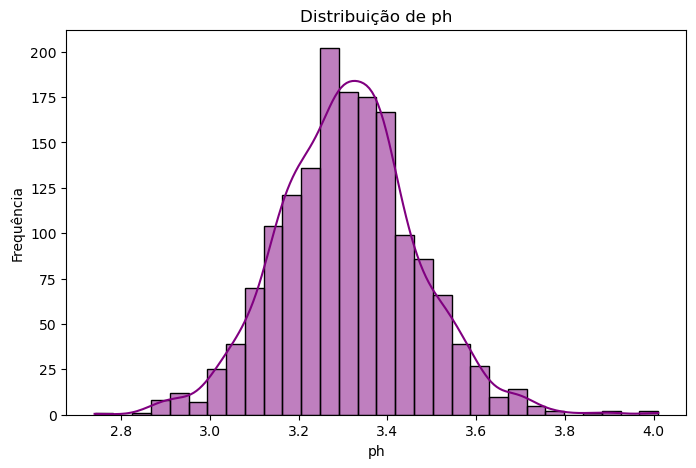

In [3]:
# Histograma
# Gráfico de histograma
grafo_distribuicao(df, 'ph')

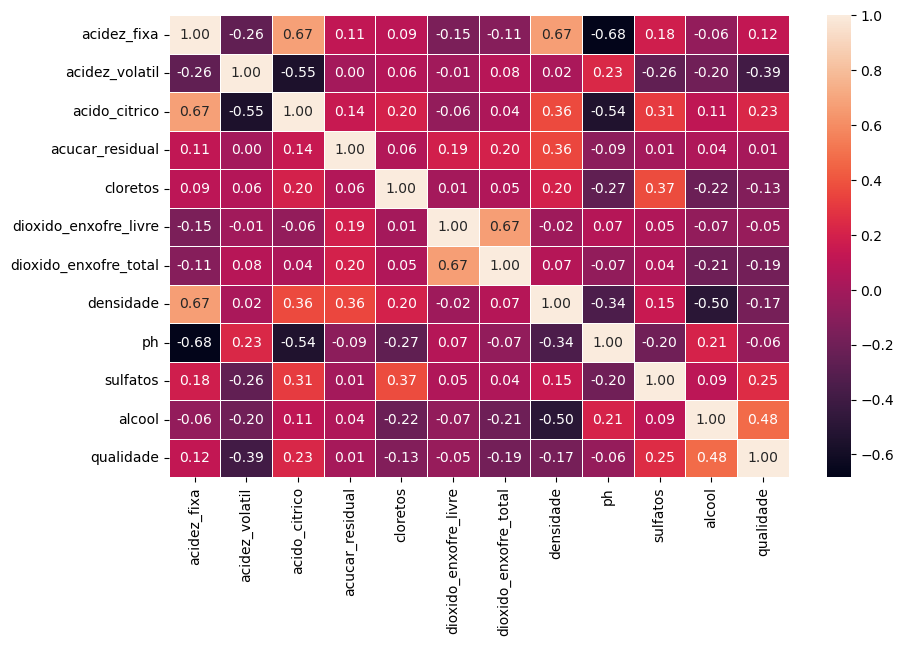

In [3]:
# Correlação das variáveis
grafo_heatmap(df)

In [4]:
# Média de acidez volátil / qualidade
media_acidez_qualidade = pd.DataFrame(df.groupby('qualidade')['acidez_volatil'].mean())
media_acidez_qualidade

,acidez_volatil
qualidade,
3,0.884500
4,0.693962
5,0.577041
6,0.497484
7,0.403920
8,0.423333


#### Observando váriaveis que estão correlacionadas com a qualidade do vinho

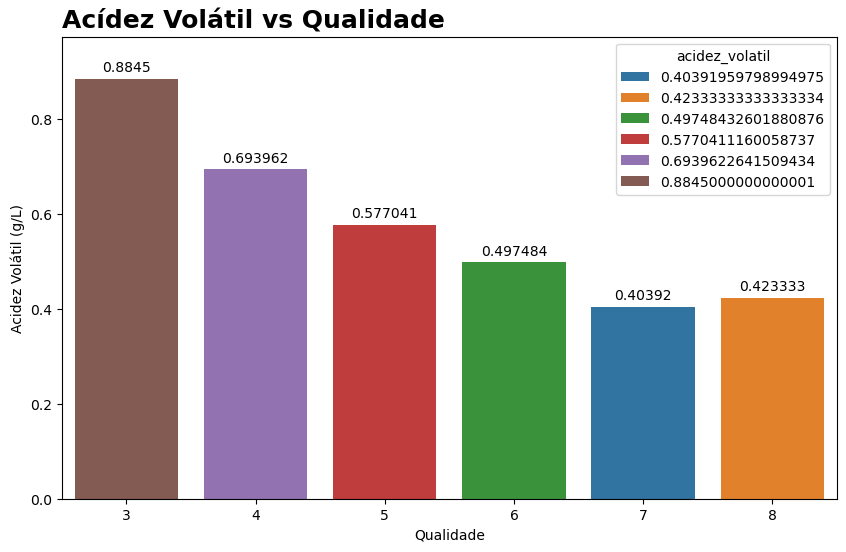

In [5]:
# Gráfico de barra Acídez Volátil / Qualidade do Vinho 0.39 de correlação
grafo_barra(media_acidez_qualidade, media_acidez_qualidade.index, media_acidez_qualidade['acidez_volatil'], media_acidez_qualidade['acidez_volatil'], titulo='Acídez Volátil vs Qualidade', ylabel='Acidez Volátil (g/L)', xlabel='Qualidade')

In [6]:
# Média de alcool / qualidade
media_alcool_qualidade = pd.DataFrame(df.groupby('qualidade')['alcool'].mean())
media_alcool_qualidade

,alcool
qualidade,
3,9.955000
4,10.265094
5,9.899706
6,10.629519
7,11.465913
8,12.094444


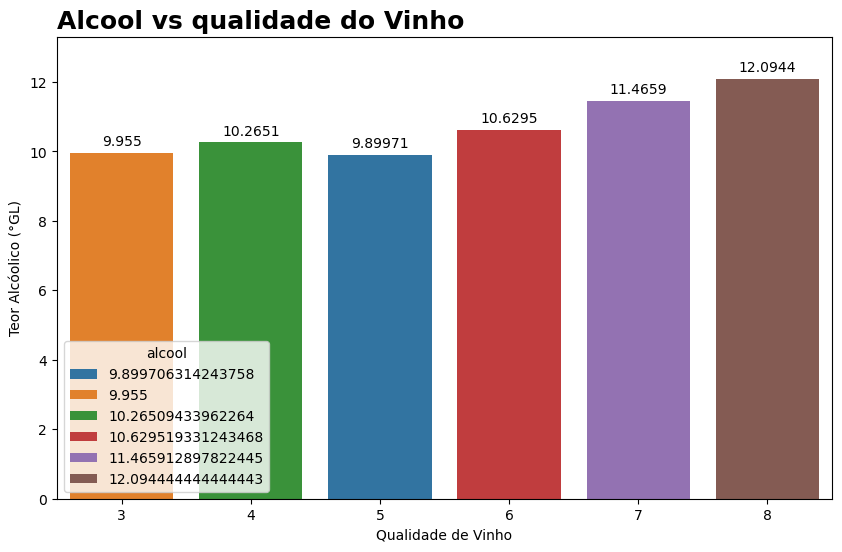

In [7]:
# Gráfico de barra alcool / Qualidade do Vinho 0.48 de correlação
grafo_barra(media_alcool_qualidade, media_alcool_qualidade.index, media_alcool_qualidade['alcool'], media_alcool_qualidade['alcool'],titulo='Alcool vs qualidade do Vinho', ylabel='Teor Alcóolico (°GL)', xlabel='Qualidade de Vinho')

In [8]:
# Média de sulfato / qualidade
media_sulfato_qualidade = pd.DataFrame(df.groupby('qualidade')['sulfatos'].mean())
media_sulfato_qualidade

,sulfatos
qualidade,
3,0.570000
4,0.596415
5,0.620969
6,0.675329
7,0.741256
8,0.767778


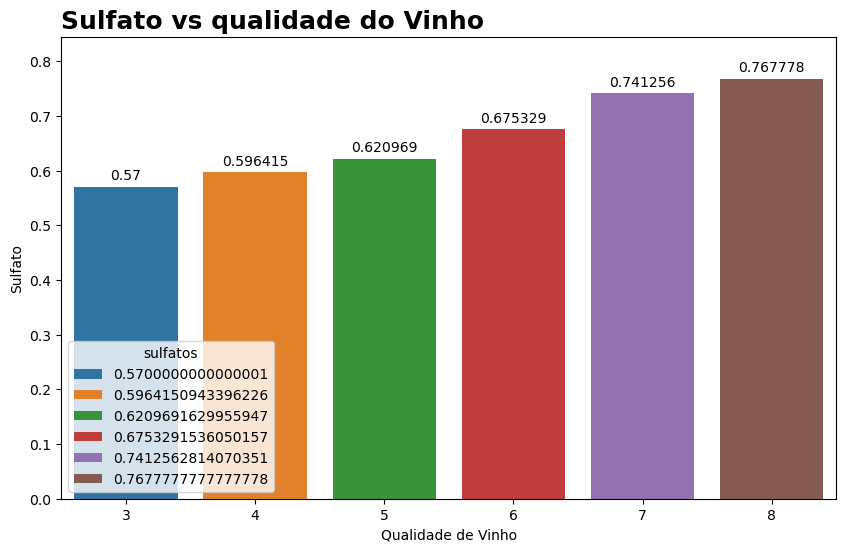

In [9]:
# Gráfico de barra Sulfato / Qualidade do Vinho 0.25 de correlação
grafo_barra(media_sulfato_qualidade, media_sulfato_qualidade.index, media_sulfato_qualidade['sulfatos'], media_sulfato_qualidade['sulfatos'],titulo='Sulfato vs qualidade do Vinho', ylabel='Sulfato', xlabel='Qualidade de Vinho')

In [10]:
# Média de Ácido Cítrico / qualidade
media_citrico_qualidade = pd.DataFrame(df.groupby('qualidade')['acido_citrico'].mean())
media_citrico_qualidade

,acido_citrico
qualidade,
3,0.171000
4,0.174151
5,0.243686
6,0.273824
7,0.375176
8,0.391111


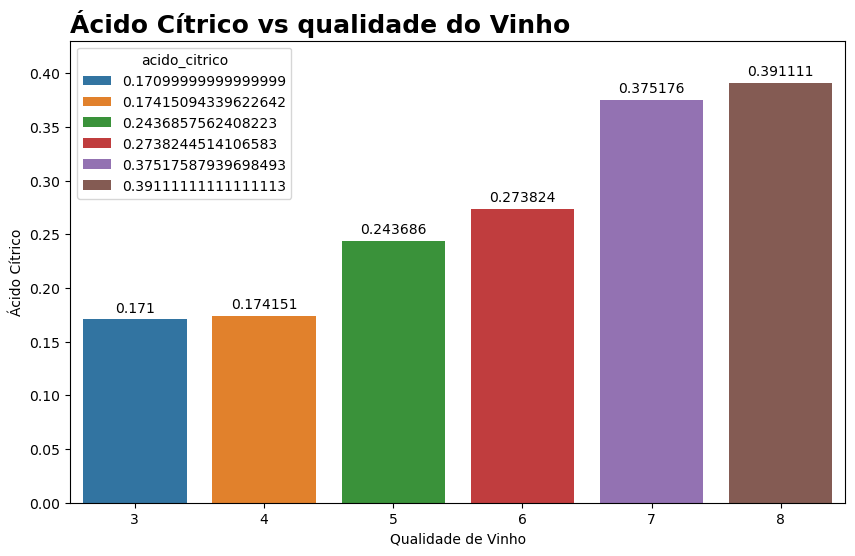

In [11]:
# Gráfico de barra Sulfato / Qualidade do Vinho 0.25 de correlação
grafo_barra(media_citrico_qualidade, media_citrico_qualidade.index, media_citrico_qualidade['acido_citrico'], media_citrico_qualidade['acido_citrico'],titulo='Ácido Cítrico vs qualidade do Vinho', ylabel='Ácido Cítrico', xlabel='Qualidade de Vinho')

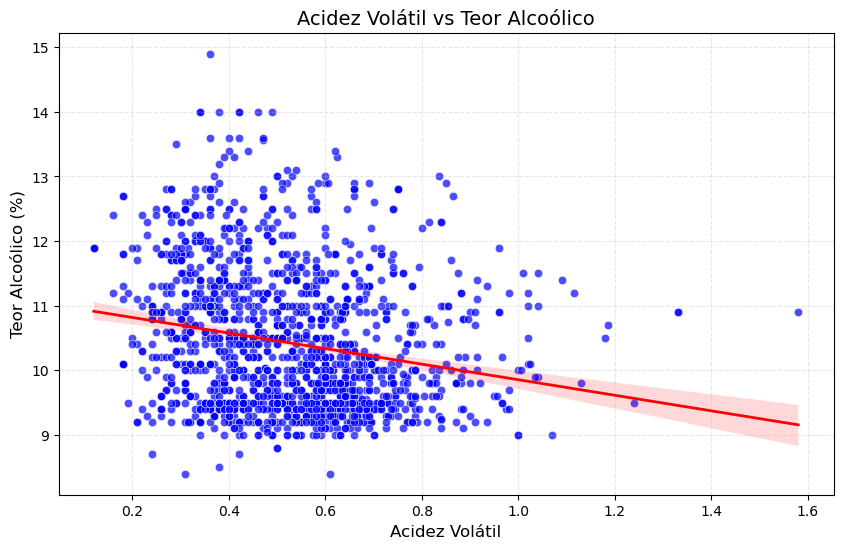

In [ ]:
# Relação entre acidez volátil e teor alcóolico
grafo_scatterplot(df, df['acidez_volatil'], df['alcool'], titulo='Acidez Volátil vs Teor Alcoólico', xlabel='Acidez Volátil', ylabel='Teor Alcoólico (%)')

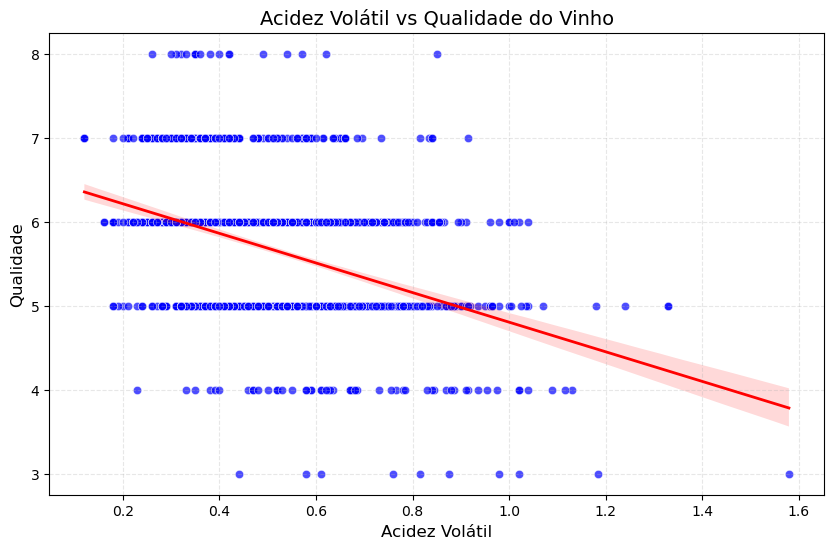

In [4]:
# Relação entre acidez volátil e teor qualidade do vinho
grafo_scatterplot(df, df['acidez_volatil'], df['qualidade'], titulo='Acidez Volátil vs Qualidade do Vinho', xlabel='Acidez Volátil', ylabel='Qualidade')

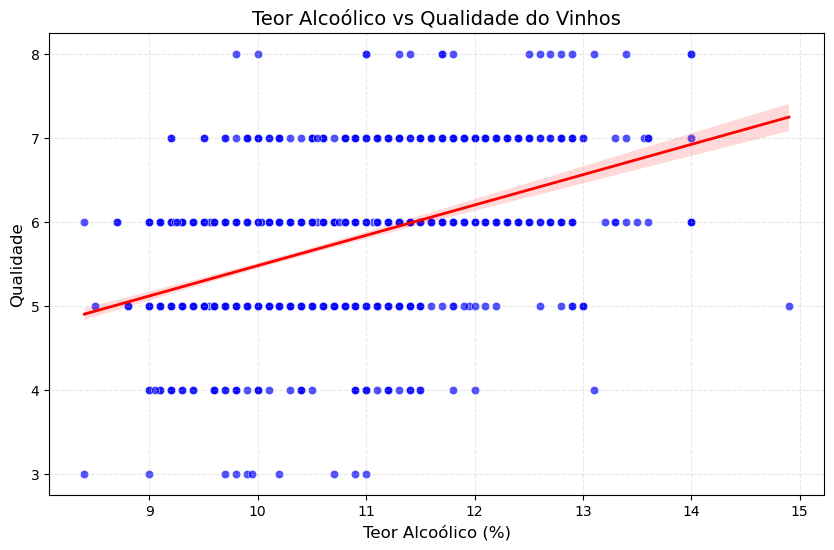

In [ ]:
# Relação entre teor alcóolico vs qualidade do vinho
grafo_scatterplot(df, df['alcool'], df['qualidade'], titulo='Teor Alcoólico vs Qualidade do Vinho', xlabel='Teor Alcoólico (%)', ylabel='Qualidade')

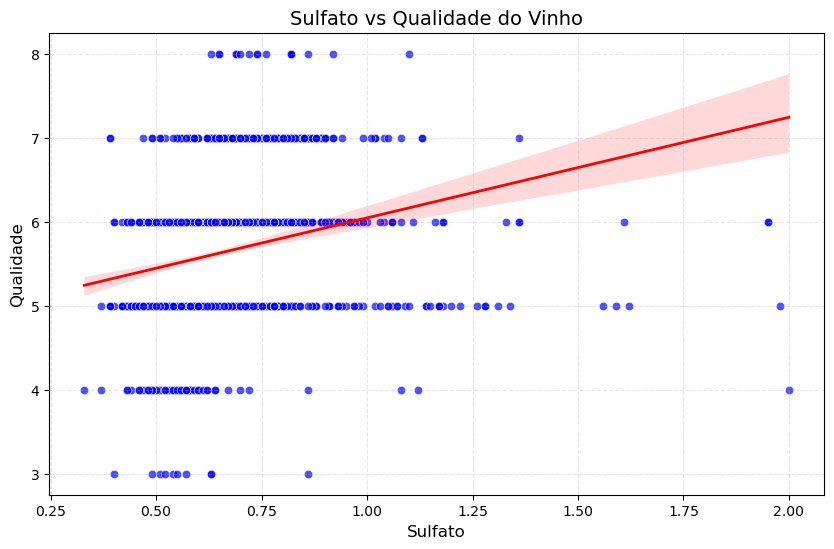

In [ ]:
# Relação entre sulfato vs qualidade do vinho
grafo_scatterplot(df, df['sulfatos'], df['qualidade'], titulo='Sulfato vs Qualidade do Vinho', xlabel='Sulfato', ylabel='Qualidade')

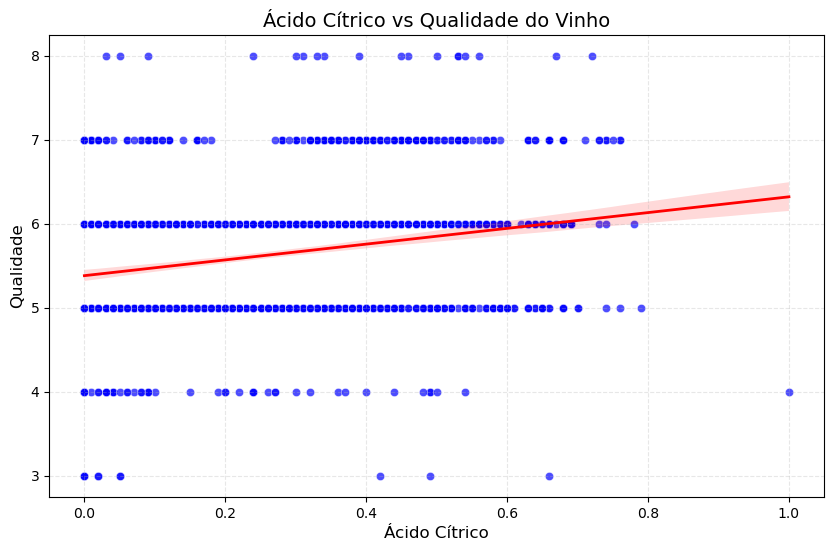

In [21]:
# Relação entre ácido cítrico vs qualidade do vinho
grafo_scatterplot(df, df['acido_citrico'], df['qualidade'], titulo='Ácido Cítrico vs Qualidade do Vinho', xlabel='Ácido Cítrico', ylabel='Qualidade')

In [ ]:
# Testes estatísticos observando se distribuição padrão nas variáveis
skewness, kurtosis = calcula_skew_kurtosis(df)
print(f'Skewness:\n\n{skewness}')
print(" ")
print(f'Kurtosis:\n\n{kurtosis}')

Skewness:

acidez_fixa              0.982751
acidez_volatil           0.671593
acido_citrico            0.318337
acucar_residual          4.540655
cloretos                 5.680347
dioxido_enxofre_livre    1.250567
dioxido_enxofre_total    1.515531
densidade                0.071288
ph                       0.193683
sulfatos                 2.428672
alcool                   0.860829
qualidade                0.217802
dtype: float64
 
Kurtosis:

acidez_fixa               1.132143
acidez_volatil            1.225542
acido_citrico            -0.788998
acucar_residual          28.617595
cloretos                 41.715787
dioxido_enxofre_livre     2.023562
dioxido_enxofre_total     3.809824
densidade                 0.934079
ph                        0.806943
sulfatos                 11.720251
alcool                    0.200029
qualidade                 0.296708
dtype: float64


In [ ]:
# Outliers na coluna espeficica
detecta_outliers_iqr(df,'acidez_volatil')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfatos,alcool,qualidade
38,5.7,1.130,0.09,1.50,0.172,7.0,19.0,0.99400,3.50,0.48,9.8,4
94,5.0,1.020,0.04,1.40,0.045,41.0,85.0,0.99380,3.75,0.48,10.5,4
120,7.3,1.070,0.09,1.70,0.178,10.0,89.0,0.99620,3.30,0.57,9.0,5
126,8.2,1.330,0.00,1.70,0.081,3.0,12.0,0.99640,3.53,0.49,10.9,5
127,8.1,1.330,0.00,1.80,0.082,3.0,12.0,0.99640,3.54,0.48,10.9,5
134,7.9,1.040,0.05,2.20,0.084,13.0,29.0,0.99590,3.22,0.55,9.9,6
199,6.9,1.090,0.06,2.10,0.061,12.0,31.0,0.99480,3.51,0.43,11.4,4
553,5.0,1.040,0.24,1.60,0.050,32.0,96.0,0.99340,3.74,0.62,11.5,5
672,9.8,1.240,0.34,2.00,0.079,32.0,151.0,0.99800,3.15,0.53,9.5,5
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3


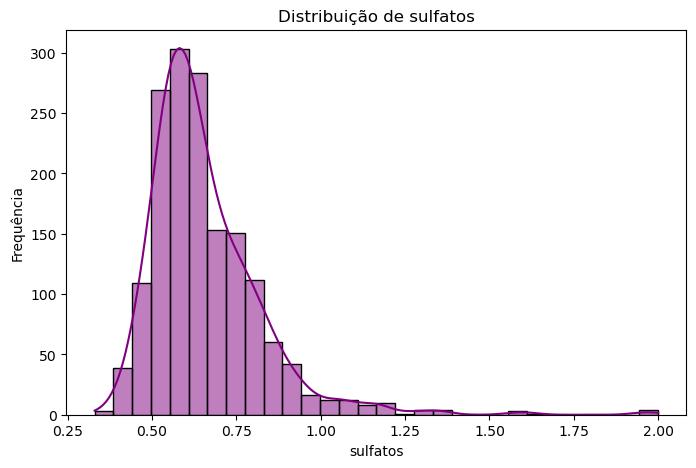

In [9]:
grafo_distribuicao(df, 'sulfatos')